# LoanTap logistic regresion


## Introduction
The organization Has the data about the individual credit borrowers and tries to understand to whom to extend the credit. We tries to understand the important information about the individuals and tries to predict the wheather they fully pay the borrowed amount or they charged off.


## Data dictionary:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
4. grade : LoanTap assigned loan grade
5. sub_grade : LoanTap assigned loan subgrade
6. emp_title :The job title supplied by the Borrower when applying for the loan.*
7. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
9. annual_inc : The self-reported annual income provided by the borrower during registration.
10. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
11. issue_d : The month which the loan was funded
12. loan_status : Current status of the loan - Target Variable
13. purpose : A category provided by the borrower for the loan request.
14. title : The loan title provided by the borrower
15. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

## Problem Statement and methodology:

- Problem STatement:
Given the relevent information about an individual predict weather they fully pay the credit or they charge-off
Independent Variables in the data:
Dependent variable:

- Methodology:
1. Check for missing/Null values and replace or delete them
2. Check for duplicate values and process the data
3. Distribution of independent variables and their influence on target variable (Univariate analysis)
4. Relationships among independent variables (Multivariate analysis)
5. Encoding of Categorical Variables and Feature selection
5. Normalization/ Standardization of data
6. Trining the model
7. Evaluation of the model
7. Conclusions and recommendations

In [2]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
# load data
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921"
data = pd.read_csv(url)

In [5]:
def train_test_split(data,test_size = 0.2,train_size = 0.8):
  length = len(data)
  arr = np.arange(length)
  rng = np.random.default_rng()
  rng.shuffle(arr)
  train_length = round(train_size * length)
  return data.iloc[arr[:train_length]], data.iloc[arr[train_length:]]


In [6]:
# splitting the data into training and testing groups
train_data, test_data = train_test_split(data,test_size = 0.2,train_size = 0.8)

In [7]:
print("Training data size:", train_data.shape)
print("Testing data size: ",test_data.shape)

Training data size: (316824, 27)
Testing data size:  (79206, 27)


# Exploratory Data Analysis

## Examining the distribution of Target columns

(array([ 62297.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 254527.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

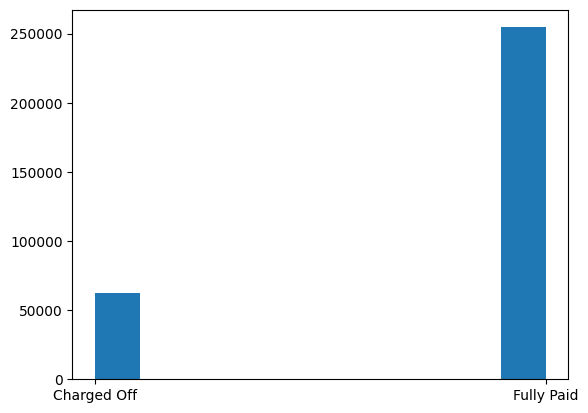

In [8]:
plt.hist(train_data['loan_status'])


In [9]:
100 * train_data['loan_status'].value_counts() / len(train_data['loan_status'])

Fully Paid     80.337033
Charged Off    19.662967
Name: loan_status, dtype: float64

Inference:
The training data is imbalenced. Most of the Users have fully paid the amount. We have to keep in mind the imbance in modelling process and validating the model performance.

# Univariate Analysis:


## Examining missing Values

In [10]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
          # Total missing values
          mis_val = df.isnull().sum()

          # Percentage of missing values
          mis_val_percent = 100 * df.isnull().sum() / len(df)

          # Make a table with the results
          mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

          # Rename the columns
          mis_val_table_ren_columns = mis_val_table.rename(
          columns = {0 : 'Missing Values', 1 : '% of Total Values'})

          # Sort the table by percentage of missing descending
          mis_val_table_ren_columns = mis_val_table_ren_columns[
              mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
          '% of Total Values', ascending=False).round(1)

          # Print some summary information
          print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
              "There are " + str(mis_val_table_ren_columns.shape[0]) +
                " columns that have missing values.")

          # Return the dataframe with missing information
          return mis_val_table_ren_columns

In [11]:
missing_values_table(train_data)

Your selected dataframe has 27 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
mort_acc,30287,9.6
emp_title,18364,5.8
emp_length,14671,4.6
title,1389,0.4
pub_rec_bankruptcies,435,0.1
revol_util,214,0.1


Inference:
We have six variables with missing values. the missing value count is less han 10 % of the data. since we do not yet kow the importance of these columns we keep them as it is for timebeing

## Replacing missing values

In [12]:
(100 *train_data['mort_acc'].value_counts()/len(train_data['mort_acc']))

0.0     35.254905
1.0     15.281355
2.0     12.630672
3.0      9.616380
4.0      7.021248
5.0      4.610762
6.0      2.783564
7.0      1.530503
8.0      0.775194
9.0      0.408113
10.0     0.215577
11.0     0.123728
12.0     0.069755
13.0     0.036929
14.0     0.026513
15.0     0.016413
16.0     0.010416
17.0     0.005681
18.0     0.005366
19.0     0.003788
20.0     0.003788
24.0     0.002525
22.0     0.001894
21.0     0.001263
27.0     0.000947
26.0     0.000631
31.0     0.000631
23.0     0.000631
32.0     0.000631
34.0     0.000316
28.0     0.000316
Name: mort_acc, dtype: float64

In [13]:
train_data['mort_acc'].median()

1.0

Since morethan

<Axes: ylabel='Density'>

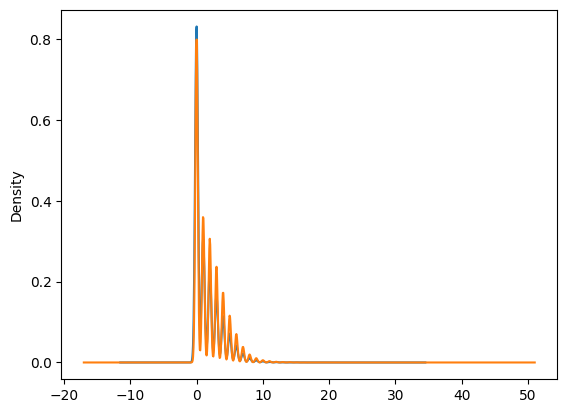

In [14]:
train_data[train_data['loan_status'] == "Charged Off"]['mort_acc'].plot.kde()
train_data[train_data['loan_status'] == "Fully Paid"]['mort_acc'].plot.kde()

In [15]:
train_data[train_data['mort_acc'].isnull()]['loan_status'].value_counts()/len(train_data[train_data['mort_acc'].isnull()]['loan_status'])

Fully Paid     0.852874
Charged Off    0.147126
Name: loan_status, dtype: float64

In [16]:
train_data[~train_data['mort_acc'].isnull()]['loan_status'].value_counts()/len(train_data[~train_data['mort_acc'].isnull()]['loan_status'])

Fully Paid     0.798138
Charged Off    0.201862
Name: loan_status, dtype: float64

Insights: The variable mort_acc looks like missing at random because, loan_status doesnot change aplargely in the cases where mort_acc data is missing. Te data is skewed to the right. WE will replace missing values with median in this case.

In [17]:
train_data['mort_acc'] = train_data['mort_acc'].fillna(train_data['mort_acc'].median())
# testing data replacement
test_data['mort_acc'] = test_data['mort_acc'].fillna(test_data['mort_acc'].median())

<ipython-input-17-9553c2375c08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['mort_acc'] = train_data['mort_acc'].fillna(train_data['mort_acc'].median())
<ipython-input-17-9553c2375c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['mort_acc'] = test_data['mort_acc'].fillna(test_data['mort_acc'].median())


In [18]:
missing_value_columns = train_data.columns[train_data.isnull().any()]

In [19]:
d = {}
for i in missing_value_columns:
  d[i] = [train_data[train_data[i].isnull()]['loan_status'].value_counts()/len(train_data[train_data[i].isnull()]['loan_status']),
          train_data[~train_data[i].isnull()]['loan_status'].value_counts()/len(train_data[~train_data[i].isnull()]['loan_status'])]

In [20]:
pd.DataFrame(d)

,emp_title,emp_length,title,revol_util,pub_rec_bankruptcies
0,Fully Paid 0.740362 Charged Off 0.25963...,Fully Paid 0.72415 Charged Off 0.27585 ...,Fully Paid 0.807055 Charged Off 0.19294...,Fully Paid 0.742991 Charged Off 0.25700...,Fully Paid 0.829885 Charged Off 0.17011...
1,Fully Paid 0.807247 Charged Off 0.19275...,Fully Paid 0.807217 Charged Off 0.19278...,Fully Paid 0.803354 Charged Off 0.19664...,Fully Paid 0.803411 Charged Off 0.19658...,Fully Paid 0.803334 Charged Off 0.19666...


Inference:
The distribution of the dependent variable among the mising values is almost same as that of the non missing data, we conclude that data is missing randomly.

In [21]:
train_data['emp_title'].value_counts()

Teacher                    3534
Manager                    3415
Registered Nurse           1497
RN                         1493
Supervisor                 1432
                           ... 
millennium trust co           1
executive director            1
sta                           1
wcch                          1
Dec Materials Associate       1
Name: emp_title, Length: 143668, dtype: int64

It does not make any scence to replace the missing values of emp_title column with most frequent value. we can not also delete this column as it contains important information. We simply replace the missing data with the "missing".

In [22]:
train_data['emp_title'] = train_data['emp_title'].fillna('missing')
test_data['emp_title'] = test_data['emp_title'].fillna('missing')

<ipython-input-22-4f14cfee25f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['emp_title'] = train_data['emp_title'].fillna('missing')
<ipython-input-22-4f14cfee25f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['emp_title'] = test_data['emp_title'].fillna('missing')


Emp_length is an integer. we are given it as an string. we replace the data with integer values

In [23]:
# encode emp_length values:
def emp_length_encode(x):
  if x == "< 1 year":
    return 0
  elif x == "2 years":
    return 2
  elif x == "3 years":
    return 3
  elif x == "4 years":
    return 4
  elif x == "5 years":
    return 5
  elif x == "6 years":
    return 6
  elif x == "7 years":
    return 7
  elif x == "8 years":
    return 8
  elif x == "9 years":
    return 9
  elif x == "10+ years":
    return 10
  else:
    return None



In [24]:
emp_length_df = train_data['emp_length'].apply(emp_length_encode)

<Axes: >

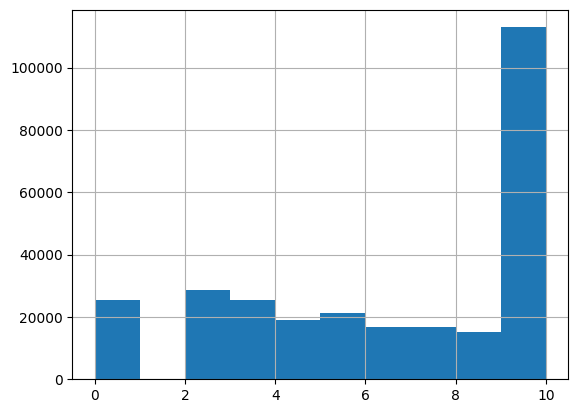

In [25]:
emp_length_df.hist()

Inference: the distribution emp_length is skewed to the left. We replace missing values with median value.

In [26]:
train_data['emp_length'] = train_data['emp_length'].apply(emp_length_encode)

<ipython-input-26-11c78cb9aa71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['emp_length'] = train_data['emp_length'].apply(emp_length_encode)


In [27]:
train_data['emp_length'] = train_data['emp_length'].fillna(train_data['emp_length'].median())
test_data['emp_length'] = test_data['emp_length'].apply(emp_length_encode)
test_data['emp_length'] = test_data['emp_length'].fillna(test_data['emp_length'].median())

<ipython-input-27-ae1a2454d8a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['emp_length'] = train_data['emp_length'].fillna(train_data['emp_length'].median())
<ipython-input-27-ae1a2454d8a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['emp_length'] = test_data['emp_length'].apply(emp_length_encode)
<ipython-input-27-ae1a2454d8a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

the missing values in the title are replaced with 'missing', since it does not make scence to replace it with most frequent value. since the missing value count is small it does not influence the model verymuch

In [28]:
train_data['title'] = train_data['title'].fillna('missing')
test_data['title'] = test_data['title'].fillna('missing')

<ipython-input-28-123751263dc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['title'] = train_data['title'].fillna('missing')
<ipython-input-28-123751263dc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['title'] = test_data['title'].fillna('missing')


<Axes: >

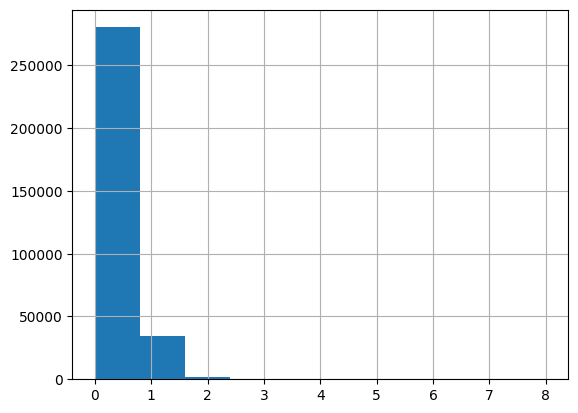

In [29]:
train_data['pub_rec_bankruptcies'].hist()

Since the distribution is skewed we replace the missing values with median. In this perticular variable the median is the mode.

In [30]:
train_data['pub_rec_bankruptcies'] = train_data['pub_rec_bankruptcies'].fillna(train_data['pub_rec_bankruptcies'].median())
test_data['pub_rec_bankruptcies'] = test_data['pub_rec_bankruptcies'].fillna(test_data['pub_rec_bankruptcies'].median())

<ipython-input-30-75252372d042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['pub_rec_bankruptcies'] = train_data['pub_rec_bankruptcies'].fillna(train_data['pub_rec_bankruptcies'].median())
<ipython-input-30-75252372d042>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pub_rec_bankruptcies'] = test_data['pub_rec_bankruptcies'].fillna(test_data['pub_rec_bankruptcies'].median())


<Axes: >

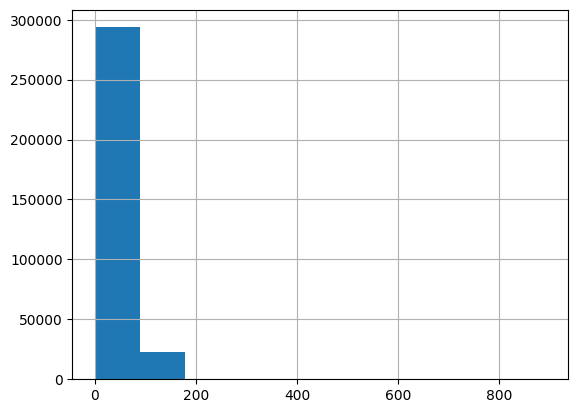

In [31]:
train_data['revol_util'].hist()

The distribution is skewed. we replace the missing data with median

In [32]:
train_data['revol_util'] = train_data['revol_util'].fillna(train_data['revol_util'].median())
test_data['revol_util'] = test_data['revol_util'].fillna(test_data['revol_util'].median())

<ipython-input-32-19c30bbc90d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['revol_util'] = train_data['revol_util'].fillna(train_data['revol_util'].median())
<ipython-input-32-19c30bbc90d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['revol_util'] = test_data['revol_util'].fillna(test_data['revol_util'].median())


In [33]:
numerical_cols = train_data.select_dtypes('float64').columns
len(numerical_cols)

13

In [34]:
categorical_cols = train_data.select_dtypes('object').columns

## Outlier detection and treatment

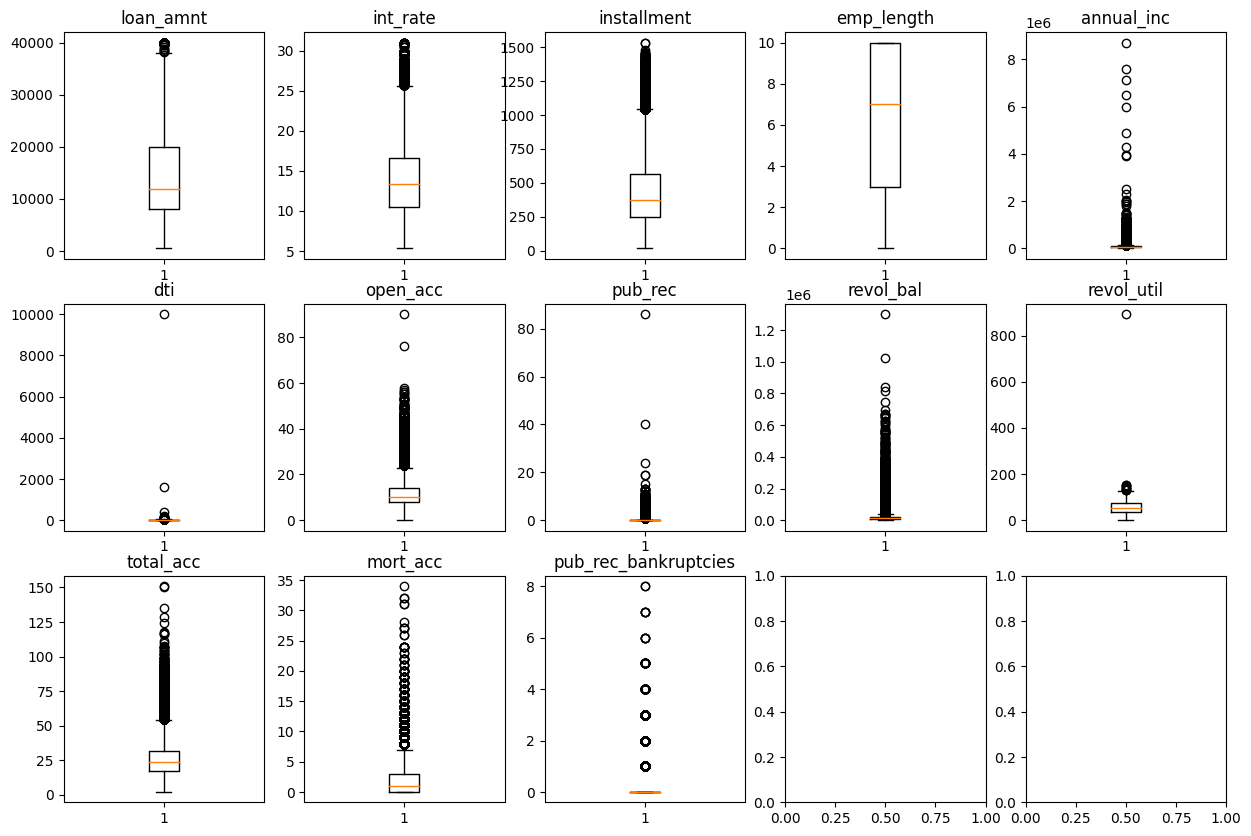

In [35]:
fig, axs = plt.subplots(3,5,figsize=(15,10))
ax = axs.flatten()
for i,col_name in enumerate(numerical_cols):
  ax[i].boxplot(train_data[col_name])
  ax[i].set_title(col_name)


Inference: Outliers are found in almost all the numerical columns. There outliers are removed ifrom the data

In [36]:
for col in numerical_cols:
    mean=train_data[col].mean()
    std=train_data[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    train_data=train_data[(train_data[col]<upper_limit) & (train_data[col]>lower_limit)]

train_data.shape

(288620, 27)

In [37]:
train_data.shape

(288620, 27)

## encoding binary variables as boolean data

In [38]:

train_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [39]:
train_data['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [40]:
loan_status ={'Fully Paid':0 , 'Charged Off':1}
train_data['loan_status'] = train_data.loan_status.map(loan_status)
test_data['loan_status'] = test_data.loan_status.map(loan_status)

<ipython-input-40-bf5b05e0aab5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['loan_status'] = test_data.loan_status.map(loan_status)


In [41]:
term_values={' 36 months': 0, ' 60 months':1}
train_data['term'] = train_data.term.map(term_values)
test_data['term'] = test_data.term.map(term_values)

<ipython-input-41-787ca2ef02a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['term'] = test_data.term.map(term_values)


In [42]:
list_status = {'w': 0, 'f': 1}
train_data['initial_list_status'] = train_data.initial_list_status.map(list_status)
test_data['initial_list_status'] = test_data.initial_list_status.map(list_status)

<ipython-input-42-bcd0750de836>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['initial_list_status'] = test_data.initial_list_status.map(list_status)


In [43]:
train_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
234462,4750.0,0,14.09,162.56,B,B5,browns equipment rentals,6.0,MORTGAGE,30000.0,Not Verified,Jul-2012,1,credit_card,credit build,6.80,Apr-2003,7.0,0.0,8223.0,84.8,9.0,1,INDIVIDUAL,0.0,0.0,43457 Patrick Mountains Suite 860\r\nLoganhave...
355232,24000.0,0,7.90,750.97,A,A4,Senior Consultant,2.0,MORTGAGE,120000.0,Source Verified,Jan-2014,0,debt_consolidation,Debt consolidation,15.71,Oct-1996,12.0,0.0,37320.0,69.0,18.0,0,INDIVIDUAL,2.0,0.0,"51019 Randy Estates Apt. 591\r\nSimmonsport, W..."
307316,15000.0,0,10.75,489.31,B,B4,Executive Admin,10.0,MORTGAGE,72000.0,Source Verified,Apr-2016,0,debt_consolidation,Debt consolidation,15.28,Oct-1977,9.0,0.0,9725.0,32.3,22.0,0,INDIVIDUAL,3.0,0.0,"8897 Tyrone Valley\r\nEast Peter, NH 29597"
71596,10000.0,0,9.16,318.75,B,B2,Financial Advisor,10.0,RENT,89000.0,Source Verified,Feb-2016,0,credit_card,Credit card refinancing,12.49,May-2000,6.0,1.0,7511.0,72.9,24.0,0,INDIVIDUAL,1.0,1.0,"41078 Michael Union Apt. 288\r\nWest Rachel, M..."
244645,4800.0,0,13.98,164.01,C,C3,Legal Assistant,7.0,RENT,75000.0,Not Verified,Jul-2014,0,credit_card,Credit card refinancing,8.05,May-1993,5.0,0.0,17374.0,79.7,10.0,0,INDIVIDUAL,0.0,0.0,"8765 Fletcher Row\r\nHartville, RI 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376388,10000.0,0,12.49,334.49,B,B5,laborer,8.0,MORTGAGE,75000.0,Verified,May-2014,0,debt_consolidation,Debt consolidation,8.76,Apr-2005,13.0,0.0,8718.0,36.3,21.0,0,INDIVIDUAL,1.0,0.0,"332 Anderson Haven Apt. 525\r\nNew Donaldfurt,..."
157232,8750.0,0,14.99,303.28,C,C5,Travel Consultant,3.0,RENT,62000.0,Verified,Jan-2015,0,debt_consolidation,Debt consolidation,14.06,Jul-2004,9.0,0.0,6751.0,47.9,22.0,1,INDIVIDUAL,0.0,0.0,"28024 William Wall Apt. 711\r\nSouth Robert, G..."
278783,11850.0,0,6.97,365.74,A,A2,Dec Materials Associate,10.0,MORTGAGE,42536.0,Source Verified,Nov-2013,0,credit_card,Debt payoff,20.06,Mar-1988,12.0,0.0,5802.0,34.7,29.0,1,INDIVIDUAL,4.0,0.0,"719 Snyder Pines\r\nMcclureside, MS 05113"
50120,5000.0,0,6.03,152.18,A,A1,Consultant,2.0,RENT,80000.0,Not Verified,May-2014,0,debt_consolidation,Debt consolidation,19.77,Oct-2003,15.0,0.0,2572.0,4.3,18.0,1,INDIVIDUAL,0.0,0.0,44619 Angela Camp Apt. 979\r\nLake Angelahaven...


In [44]:
for col in categorical_cols:
  print(col,train_data[col].nunique())

term 2
grade 7
sub_grade 35
emp_title 134429
home_ownership 6
verification_status 3
issue_d 115
loan_status 2
purpose 14
title 38503
earliest_cr_line 665
initial_list_status 2
application_type 3
address 287328


Inference: The columns sub_grade, emp_title, issue_d, title, earliest_cr_line,address are having multiple values. since these columns does not contain very crucial data we will remove these columns from our data.

# Univariate Analysis

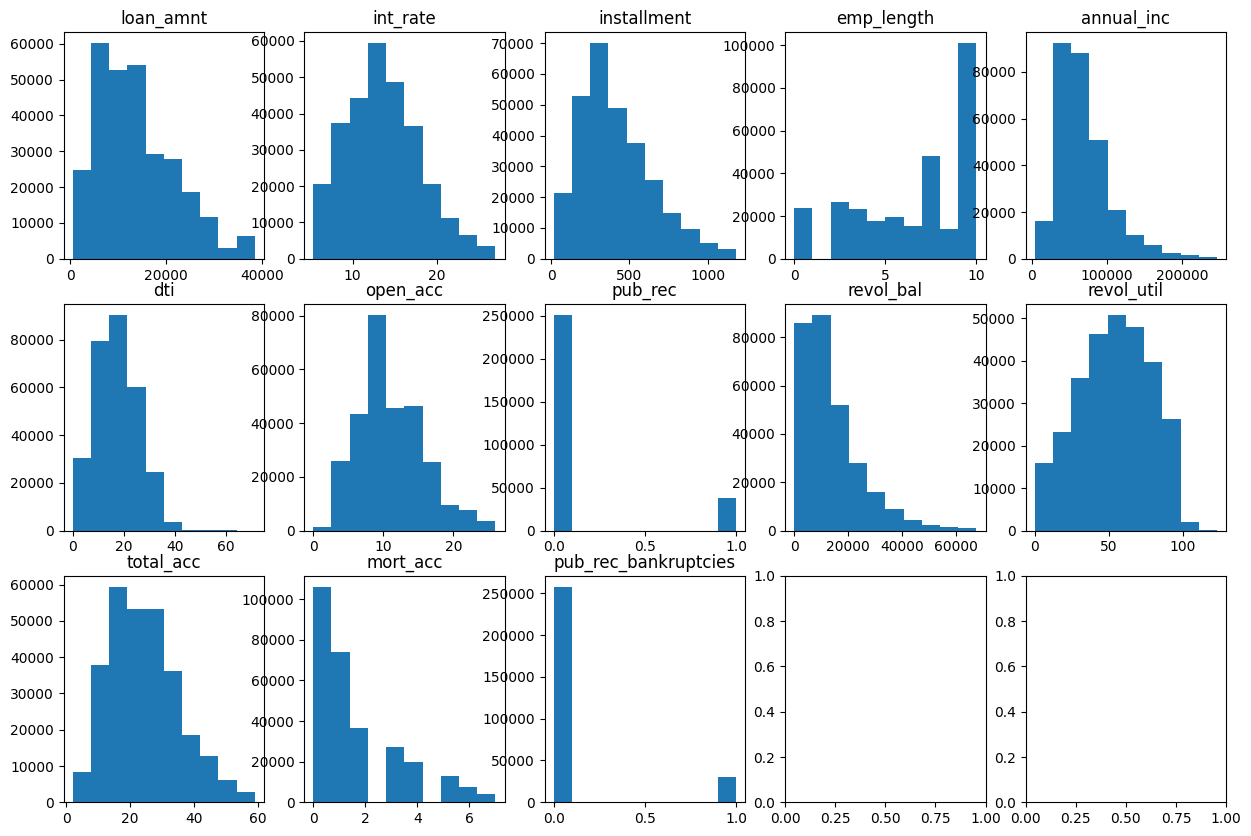

In [45]:
fig, axs = plt.subplots(3,5,figsize=(15,10))
ax = axs.flatten()
for i,col_name in enumerate(numerical_cols):
  ax[i].hist(train_data[col_name])
  ax[i].set_title(col_name)

Insights:

- Most of the distribution is highly skewed `
- Almost all the continuous features have outliers present in the dataset.

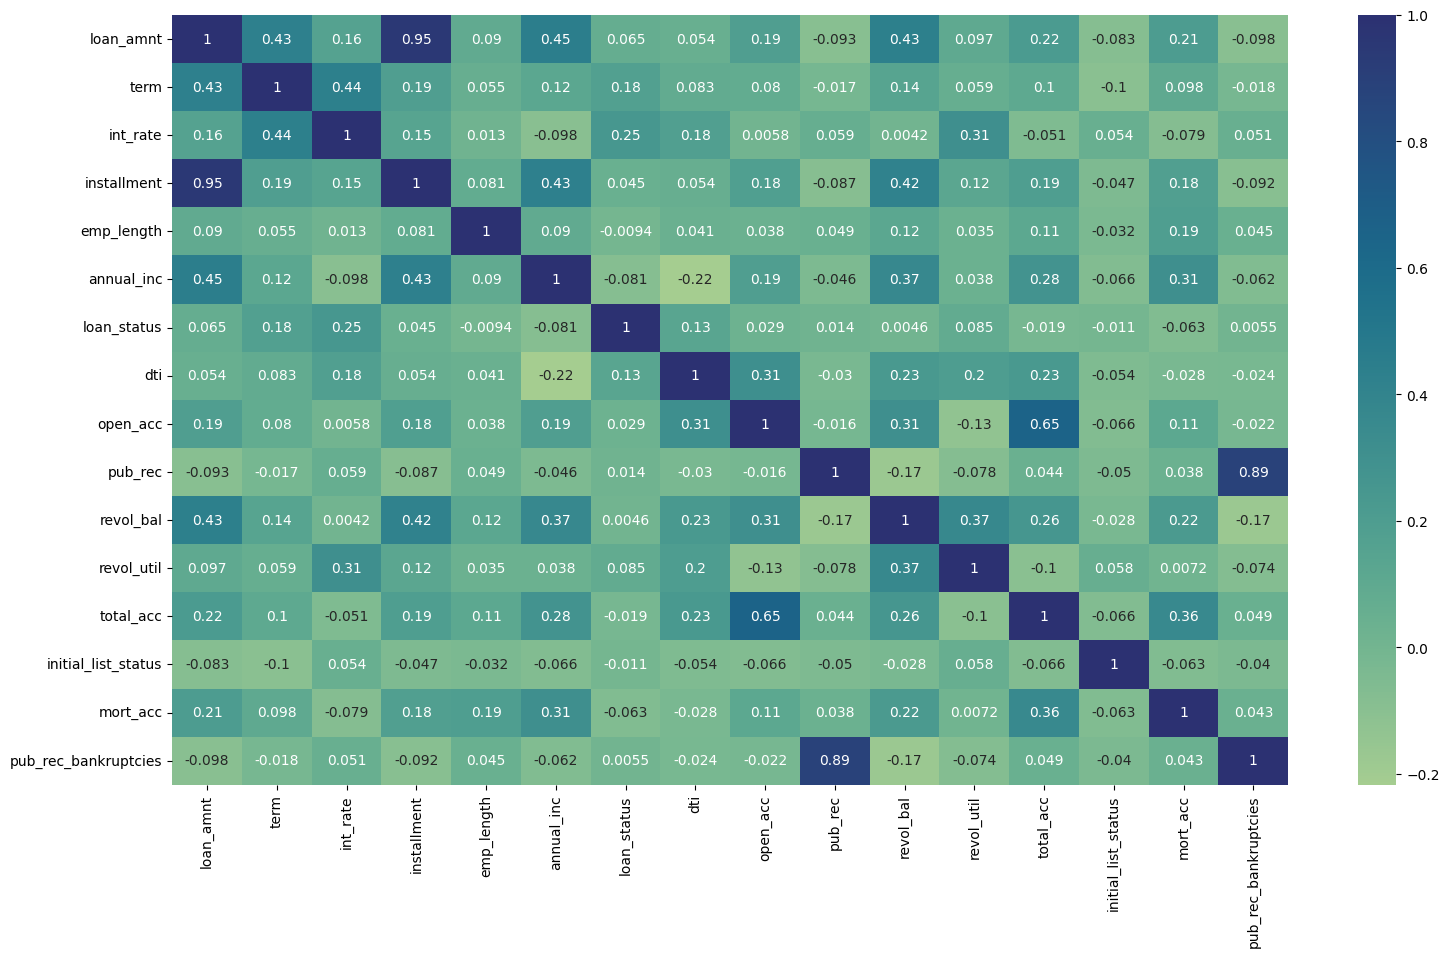

In [46]:
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(numeric_only=True), cmap = 'crest', annot = True)

plt.show()

In [47]:
# Dropping some variables which we can let go for now
train_data_reduced = train_data.drop(columns=['sub_grade', 'emp_title','issue_d', 'title',
                   'earliest_cr_line','address'])
test_data_reduced = train_data.drop(columns=['sub_grade', 'emp_title','issue_d', 'title',
                   'earliest_cr_line','address'])

In [48]:
print(train_data_reduced.shape)
print(test_data_reduced.shape)

(288620, 21)
(288620, 21)


# Categorical Data Encoding

We have used onehot encoding to encode the data since label encoding may result in misinterprenting data by the model

In [49]:
y_train = train_data_reduced.pop('loan_status')
y_test = test_data_reduced.pop('loan_status')

In [50]:
encoder = OneHotEncoder()
X_train = encoder.fit_transform(train_data_reduced)
X_test = encoder.fit_transform(test_data_reduced)

In [51]:
X_train.shape

(288620, 122311)

## Using MinAbsScalar

The data is encoded using onehot encoding method which results in sparce values in the data. In such case MinMaxScaler doesnot work. SO we have encoded the data using MinAbsScaler

In [52]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [53]:
# train the model using LogisticRegression
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
# Coefficients of the model
pd.Series((zip(train_data_reduced.columns, logreg.coef_[0])))

0                (loan_amnt, -0.21922622424933383)
1                     (term, -0.22418889614657558)
2                 (int_rate, -0.20619055713639275)
3              (installment, -0.06697110493431867)
4                     (grade, -0.6269117258971143)
5                (emp_length, 0.23577719444732642)
6           (home_ownership, -0.11167864070933674)
7                (annual_inc, -0.3792404018663174)
8       (verification_status, -0.7422953732621831)
9                   (purpose, -0.4642239946065082)
10                     (dti, -0.46011748669848823)
11                (open_acc, -0.03543490839470384)
12                   (pub_rec, -0.691826968151525)
13               (revol_bal, -0.28972594739522245)
14               (revol_util, 0.04019704864155634)
15                (total_acc, -0.2406815312327494)
16      (initial_list_status, -1.1070763990496324)
17          (application_type, 0.3740103770301377)
18                (mort_acc, -0.16712672986778443)
19    (pub_rec_bankruptcies, -0

In [55]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.853


Insight:

- Since the data is imbalenced, an accuracy of 0.85 is not a good fit. We have to look at other metrics to evaluate the model

# confusion matrix

[[228412   3366]
 [ 38956  17886]]


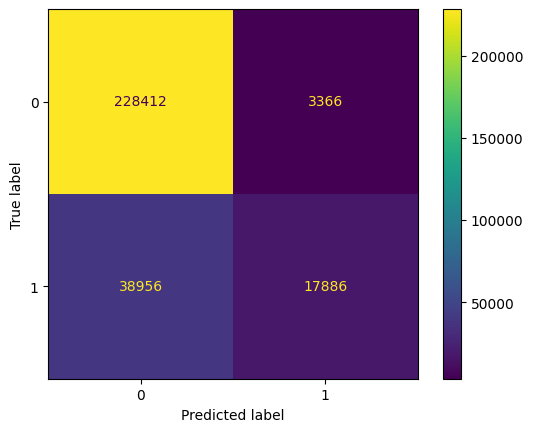

In [56]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logreg.classes_).plot()

Insights:

- the Confusion matrix gave much more insight into the model metrics.
- The false positives(type 1 error) and false negatives(type 2 error) are small compared to the correctly predicted data.

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92    231778
           1       0.84      0.31      0.46     56842

    accuracy                           0.85    288620
   macro avg       0.85      0.65      0.69    288620
weighted avg       0.85      0.85      0.83    288620



Insights:

- The model have verygood recall value in predicting nondefaulter(0) which means the Type-1 error of the model is small. which implies the model rarely predicts defaulter as nondefaulter.
- In case of predicting False Negatives the model does a bad job
- Model does a great job in predicting 0 class(fully_paid), and not doing a good job in predicting claases of class 1(Charged off)
- This may be due to the high imbalence in the training data.

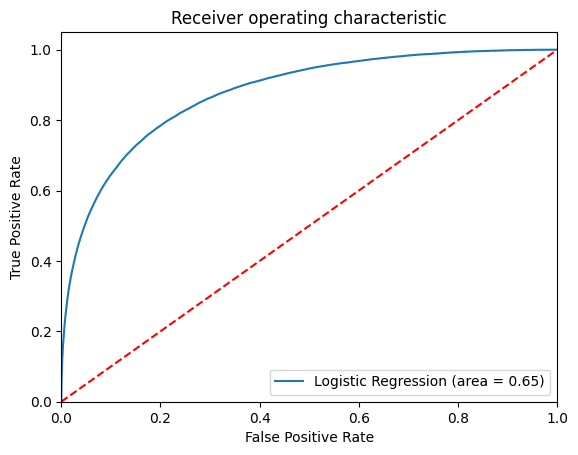

In [58]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Insight

- ROC-AUC curve is grossing the area near about 0.65 which indicates that model is performing well.
- There is still room for some model improvement
- By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

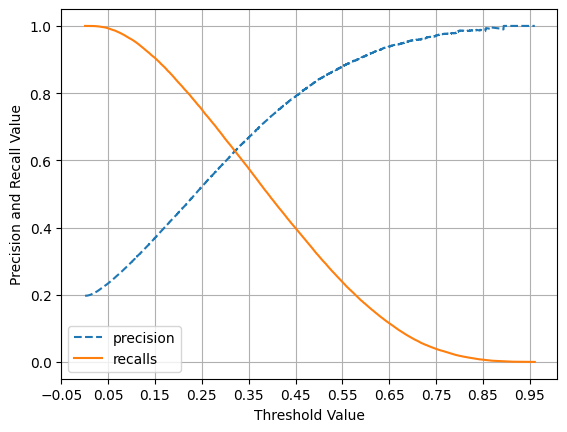

In [59]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(X_test)[:,1])

Insights

- Precision score is highest at 0.95 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.
- Recall score is higher on smaller threshold but after 0.85 the recall value is constant. Model is correctly classifying the actual predicated values as instances

##Tradeoff Questions:
 1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.


Ans:

Since data is imbalances by making the data balance we can try to avoid false positives. For evaluation metrics, we should be focusing on the macro average f1-score because we don't want to make false positive prediction and at the same we want to detect the defualers.

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

Ans:

 Below are the most features and their importance while making the prediction. So these variables can help the managers to identify which are customers who are more likely to pay the loan amount fully.

In [60]:
coefficients=pd.DataFrame((zip(train_data_reduced.columns, np.abs(logreg.coef_[0]))))

In [61]:
coefficients.sort_values(by= 1, ascending = False)

,0,1
16,initial_list_status,1.107076
8,verification_status,0.742295
12,pub_rec,0.691827
4,grade,0.626912
9,purpose,0.464224
10,dti,0.460117
7,annual_inc,0.379240
17,application_type,0.374010
13,revol_bal,0.289726
15,total_acc,0.240682


# Actionable Insights & Recommendations

- 80% of the customers have paid the loan fully.
- 20% of the customers are the defaulters.
- The organization can the trained model to make prediction for whether a - person will likely to pay the loan amount or he will be a defaulter.
- Model achieves the 92% f1-score for the negative class (Fully Paid).
- Model achieves the 46% f1-score for the positive class (Charged off).
- ROC AUC curve area of 0.65, the model is correctly classifying about 65% of the instances. This is a not a very good performance, there is still room for improvement.
- The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.
- The most important factora to look while considering loan are
1. application type
2. purpose
3. dti
4. revol_bal
5. verification_status

# Questionere

1. What percentage of customers have fully paid their Loan Amount?

Ans: 80 % of customers have fully paid their Loan Amount

In [62]:
pd.DataFrame(round((data['loan_status'].value_counts() / len(data) ), 3)).T

,Fully Paid,Charged Off
loan_status,0.804,0.196


2. Comment about the correlation between Loan Amount and Installment features.

Ans: there exists a strong positive correlation between Loan amount and Installment variables. The Pearsons correlation coefficient value is : 0.95

In [63]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

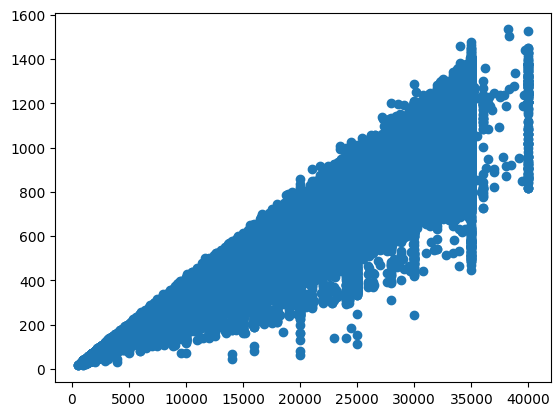

In [64]:
plt.scatter(x = data['loan_amnt'],y = data['installment'])

In [65]:
# calculating correlation coefficient
data['loan_amnt'].corr(data['installment'])

0.9539289082616194

3. The majority of people have home ownership as _______.

Ans: Most of the prople has mortage(50%) home_ownership followed by rent(40%).

In [66]:
pd.DataFrame(data['home_ownership'].value_counts())

,home_ownership
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [67]:
round((data['home_ownership'].value_counts() / len(data['home_ownership']) * 100), 3)

MORTGAGE    50.084
RENT        40.348
OWN          9.531
OTHER        0.028
NONE         0.008
ANY          0.001
Name: home_ownership, dtype: float64

3. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

The People with grade "A" fully pays the loan 94 % of the time. Hence the answer is True

In [68]:
(data[data['grade'] == "A"]['loan_status'].value_counts()/len(data[data['grade'] == "A"]['loan_status'])) * 100

Fully Paid     93.712122
Charged Off     6.287878
Name: loan_status, dtype: float64

4. Name the top 2 afforded job titles.

A=ns: Teacher(1%) and Manager(1%) are the top job titles

In [69]:
data.emp_title.value_counts() / len(data.emp_title)  * 100

Teacher                    1.108249
Manager                    1.073151
Registered Nurse           0.468651
RN                         0.466126
Supervisor                 0.462086
                             ...   
Postman                    0.000253
McCarthy & Holthus, LLC    0.000253
jp flooring                0.000253
Histology Technologist     0.000253
Gracon Services, Inc       0.000253
Name: emp_title, Length: 173105, dtype: float64